## EDA for the popular battle royale game PUBG

<img src="https://pmcvariety.files.wordpress.com/2018/04/pubg.jpg?w=1000&h=563&crop=1" alt="PUBG" style="width: 750px;"/>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../../1_Data/Raw Data/train_V2.csv')



In [3]:
df.shape

(4446966, 29)

In [4]:
df.head(3)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755


- **DBNOs** - Number of enemy players knocked.
- **assists** - Number of enemy players this player damaged that were killed by teammates.
- **boosts** - Number of boost items used.
- **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
- **headshotKills** - Number of enemy players killed with headshots.
- **heals** - Number of healing items used.
- **Id** - Player’s Id
- **killPlace** - Ranking in match of number of enemy players killed.
- **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- **killStreaks** - Max number of enemy players killed in a short amount of time.
- **kills** - Number of enemy players killed.
- **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- **matchDuration** - Duration of match in seconds.
- **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
- **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- **revives** - Number of times this player revived teammates.
- **rideDistance** - Total distance traveled in vehicles measured in meters.
- **roadKills** - Number of kills while in a vehicle.
- **swimDistance** - Total distance traveled by swimming measured in meters.
- **teamKills** - Number of times this player killed a teammate.
- **vehicleDestroys** - Number of vehicles destroyed.
- **walkDistance** - Total distance traveled on foot measured in meters.
- **weaponsAcquired** - Number of weapons picked up.
- **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- **numGroups** - Number of groups we have data for in the match.
- **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in

In [24]:
in_match_player_features = ['assists','boosts','damageDealt','DBNOs','headshotKills',
                           'killPlace','killPoints','kills','killStreaks','longestKill',
                           'revives','rideDistance','roadKills','swimDistance','roadKills',
                            'swimDistance','teamKills','vehicleDestroys','walkDistance',
                            'weaponsAcquired','winPlacePerc','heals']

global_player_features = ['killPoints','winPoints','rankPoints']

match_features = ['groupId','matchId','matchDuration']



count    4446966.000
mean           0.234
std            0.589
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           22.000
Name: assists, dtype: object
\begin{tabular}{ll}
\toprule
{} &      assists \\
\midrule
count &  4446966.000 \\
mean  &        0.234 \\
std   &        0.589 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &       22.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

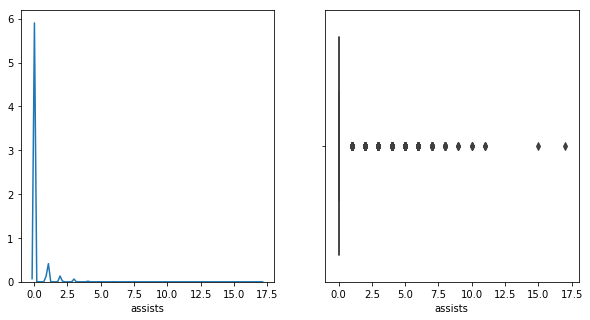

count    4446966.000
mean           1.107
std            1.716
min            0.000
25%            0.000
50%            0.000
75%            2.000
max           33.000
Name: boosts, dtype: object
\begin{tabular}{ll}
\toprule
{} &       boosts \\
\midrule
count &  4446966.000 \\
mean  &        1.107 \\
std   &        1.716 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        2.000 \\
max   &       33.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

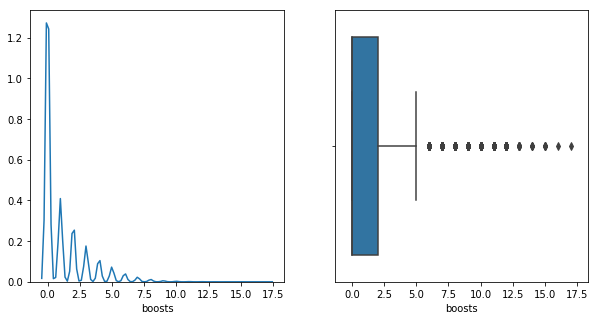

count    4446966.000
mean         130.717
std          170.781
min            0.000
25%            0.000
50%           84.240
75%          186.000
max         6616.000
Name: damageDealt, dtype: object
\begin{tabular}{ll}
\toprule
{} &  damageDealt \\
\midrule
count &  4446966.000 \\
mean  &      130.717 \\
std   &      170.781 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &       84.240 \\
75\%   &      186.000 \\
max   &     6616.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

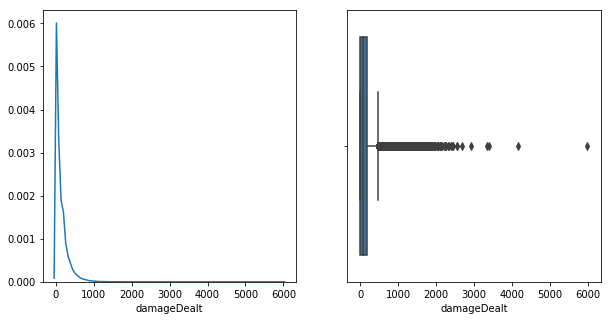

count    4446966.000
mean           0.658
std            1.146
min            0.000
25%            0.000
50%            0.000
75%            1.000
max           53.000
Name: DBNOs, dtype: object
\begin{tabular}{ll}
\toprule
{} &        DBNOs \\
\midrule
count &  4446966.000 \\
mean  &        0.658 \\
std   &        1.146 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        1.000 \\
max   &       53.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

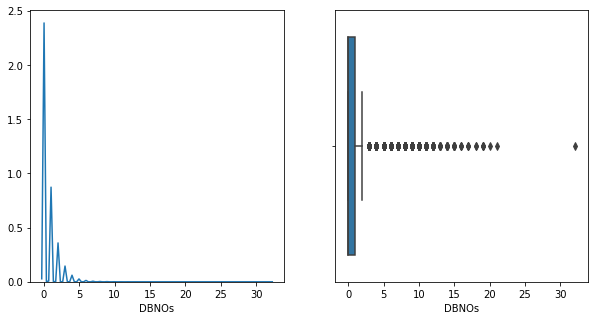

count    4446966.000
mean           0.227
std            0.602
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           64.000
Name: headshotKills, dtype: object
\begin{tabular}{ll}
\toprule
{} & headshotKills \\
\midrule
count &   4446966.000 \\
mean  &         0.227 \\
std   &         0.602 \\
min   &         0.000 \\
25\%   &         0.000 \\
50\%   &         0.000 \\
75\%   &         0.000 \\
max   &        64.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

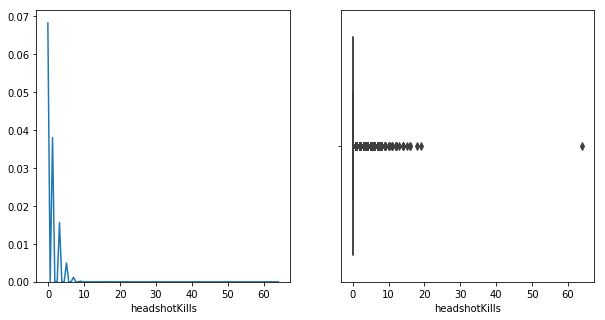

count    4446966.000
mean          47.599
std           27.463
min            1.000
25%           24.000
50%           47.000
75%           71.000
max          101.000
Name: killPlace, dtype: object
\begin{tabular}{ll}
\toprule
{} &    killPlace \\
\midrule
count &  4446966.000 \\
mean  &       47.599 \\
std   &       27.463 \\
min   &        1.000 \\
25\%   &       24.000 \\
50\%   &       47.000 \\
75\%   &       71.000 \\
max   &      101.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

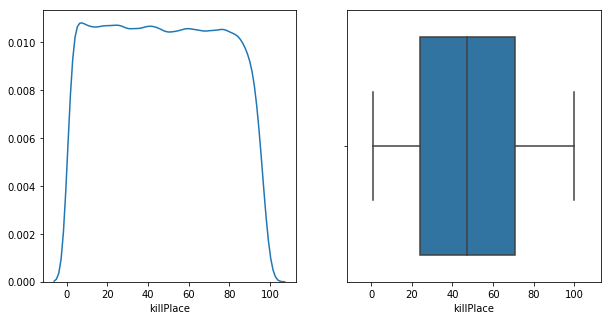

count    4446966.000
mean         505.006
std          627.505
min            0.000
25%            0.000
50%            0.000
75%         1172.000
max         2170.000
Name: killPoints, dtype: object
\begin{tabular}{ll}
\toprule
{} &   killPoints \\
\midrule
count &  4446966.000 \\
mean  &      505.006 \\
std   &      627.505 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &     1172.000 \\
max   &     2170.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

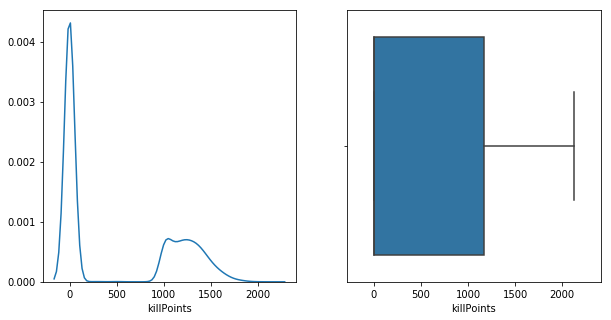

count    4446966.000
mean           0.925
std            1.558
min            0.000
25%            0.000
50%            0.000
75%            1.000
max           72.000
Name: kills, dtype: object
\begin{tabular}{ll}
\toprule
{} &        kills \\
\midrule
count &  4446966.000 \\
mean  &        0.925 \\
std   &        1.558 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        1.000 \\
max   &       72.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

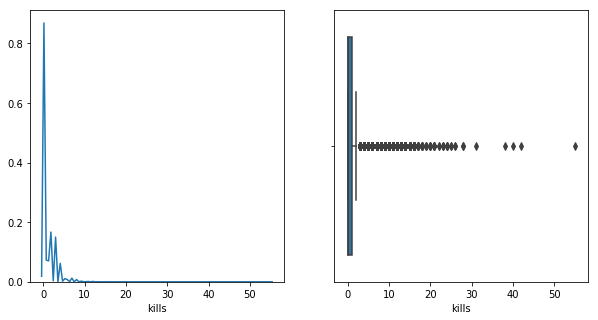

count    4446966.000
mean           0.544
std            0.711
min            0.000
25%            0.000
50%            0.000
75%            1.000
max           20.000
Name: killStreaks, dtype: object
\begin{tabular}{ll}
\toprule
{} &  killStreaks \\
\midrule
count &  4446966.000 \\
mean  &        0.544 \\
std   &        0.711 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        1.000 \\
max   &       20.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

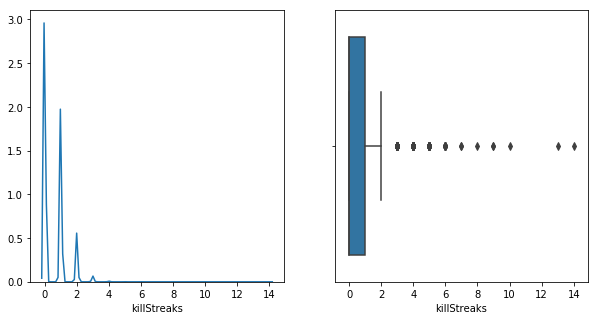

count    4446966.000
mean          22.998
std           50.973
min            0.000
25%            0.000
50%            0.000
75%           21.320
max         1094.000
Name: longestKill, dtype: object
\begin{tabular}{ll}
\toprule
{} &  longestKill \\
\midrule
count &  4446966.000 \\
mean  &       22.998 \\
std   &       50.973 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &       21.320 \\
max   &     1094.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

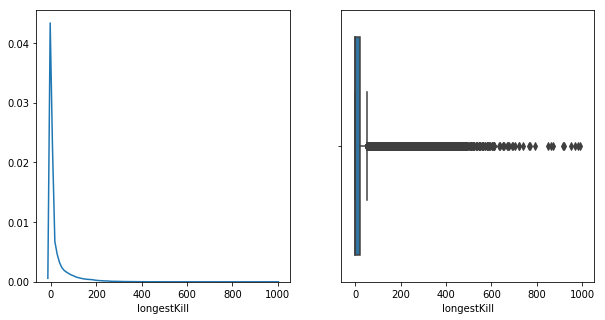

count    4446966.000
mean           0.165
std            0.472
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           39.000
Name: revives, dtype: object
\begin{tabular}{ll}
\toprule
{} &      revives \\
\midrule
count &  4446966.000 \\
mean  &        0.165 \\
std   &        0.472 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &       39.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

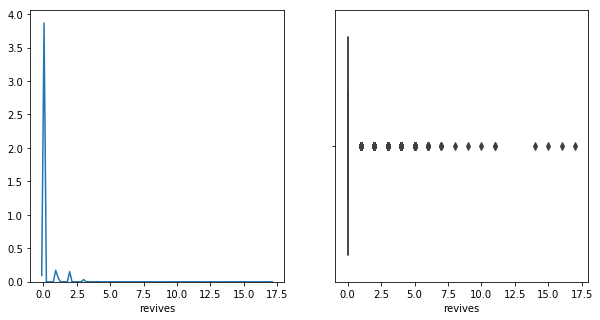

count    4446966.000
mean         606.116
std         1498.344
min            0.000
25%            0.000
50%            0.000
75%            0.191
max        40710.000
Name: rideDistance, dtype: object
\begin{tabular}{ll}
\toprule
{} & rideDistance \\
\midrule
count &  4446966.000 \\
mean  &      606.116 \\
std   &     1498.344 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.191 \\
max   &    40710.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

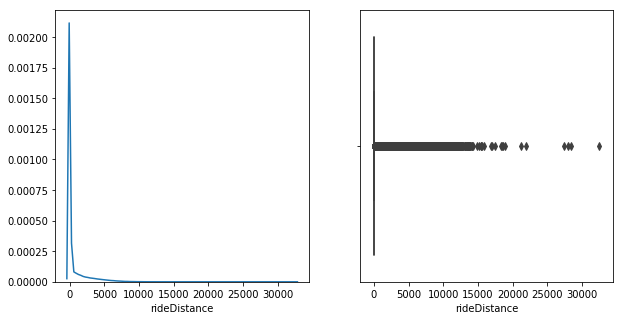

count    4446966.000
mean           0.003
std            0.073
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           18.000
Name: roadKills, dtype: object
\begin{tabular}{ll}
\toprule
{} &    roadKills \\
\midrule
count &  4446966.000 \\
mean  &        0.003 \\
std   &        0.073 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &       18.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

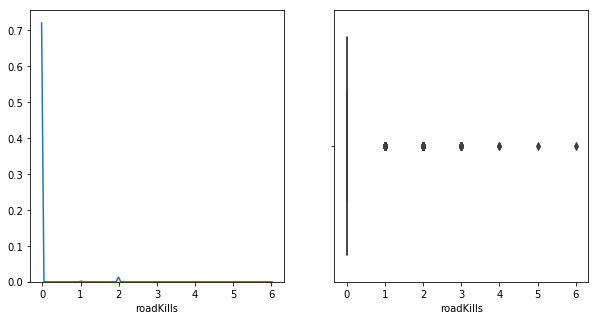

count    4446966.000
mean           4.509
std           30.502
min            0.000
25%            0.000
50%            0.000
75%            0.000
max         3823.000
Name: swimDistance, dtype: object
\begin{tabular}{ll}
\toprule
{} & swimDistance \\
\midrule
count &  4446966.000 \\
mean  &        4.509 \\
std   &       30.502 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &     3823.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

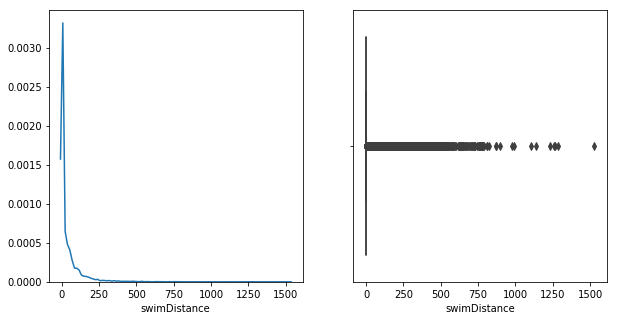

count    4446966.000
mean           0.003
std            0.073
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           18.000
Name: roadKills, dtype: object
\begin{tabular}{ll}
\toprule
{} &    roadKills \\
\midrule
count &  4446966.000 \\
mean  &        0.003 \\
std   &        0.073 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &       18.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

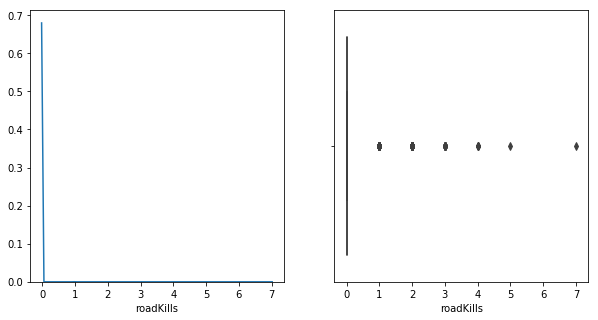

count    4446966.000
mean           4.509
std           30.502
min            0.000
25%            0.000
50%            0.000
75%            0.000
max         3823.000
Name: swimDistance, dtype: object
\begin{tabular}{ll}
\toprule
{} & swimDistance \\
\midrule
count &  4446966.000 \\
mean  &        4.509 \\
std   &       30.502 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &     3823.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

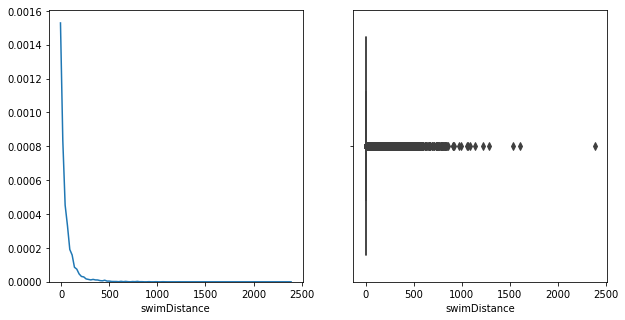

count    4446966.000
mean           0.024
std            0.167
min            0.000
25%            0.000
50%            0.000
75%            0.000
max           12.000
Name: teamKills, dtype: object
\begin{tabular}{ll}
\toprule
{} &    teamKills \\
\midrule
count &  4446966.000 \\
mean  &        0.024 \\
std   &        0.167 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        0.000 \\
max   &       12.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

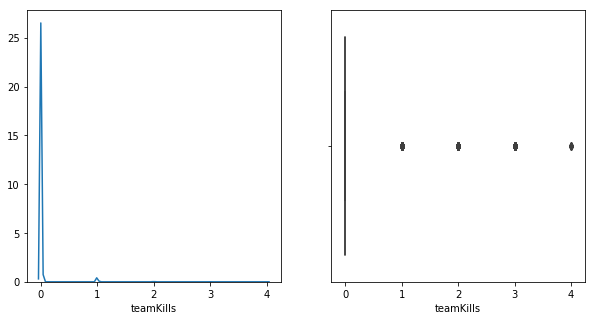

count    4446966.000
mean           0.008
std            0.093
min            0.000
25%            0.000
50%            0.000
75%            0.000
max            5.000
Name: vehicleDestroys, dtype: object
\begin{tabular}{ll}
\toprule
{} & vehicleDestroys \\
\midrule
count &     4446966.000 \\
mean  &           0.008 \\
std   &           0.093 \\
min   &           0.000 \\
25\%   &           0.000 \\
50\%   &           0.000 \\
75\%   &           0.000 \\
max   &           5.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

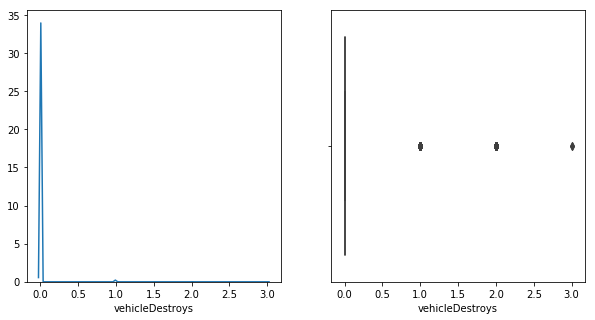

count    4446966.000
mean        1154.218
std         1183.497
min            0.000
25%          155.100
50%          685.600
75%         1976.000
max        25780.000
Name: walkDistance, dtype: object
\begin{tabular}{ll}
\toprule
{} & walkDistance \\
\midrule
count &  4446966.000 \\
mean  &     1154.218 \\
std   &     1183.497 \\
min   &        0.000 \\
25\%   &      155.100 \\
50\%   &      685.600 \\
75\%   &     1976.000 \\
max   &    25780.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

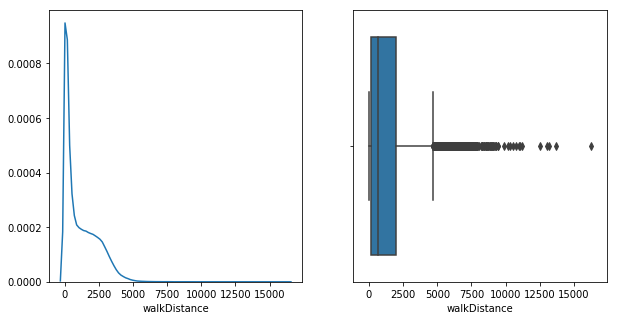

count    4446966.000
mean           3.660
std            2.457
min            0.000
25%            2.000
50%            3.000
75%            5.000
max          236.000
Name: weaponsAcquired, dtype: object
\begin{tabular}{ll}
\toprule
{} & weaponsAcquired \\
\midrule
count &     4446966.000 \\
mean  &           3.660 \\
std   &           2.457 \\
min   &           0.000 \\
25\%   &           2.000 \\
50\%   &           3.000 \\
75\%   &           5.000 \\
max   &         236.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

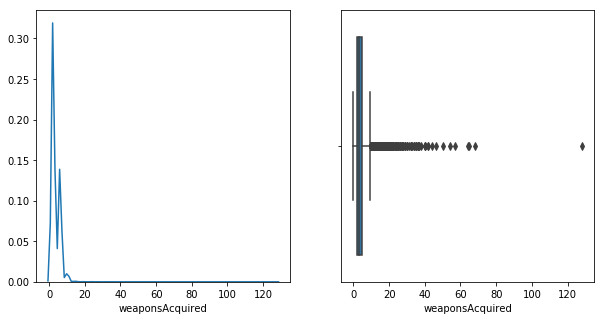

count    4446965.000
mean           0.473
std            0.307
min            0.000
25%            0.200
50%            0.458
75%            0.741
max            1.000
Name: winPlacePerc, dtype: object
\begin{tabular}{ll}
\toprule
{} & winPlacePerc \\
\midrule
count &  4446965.000 \\
mean  &        0.473 \\
std   &        0.307 \\
min   &        0.000 \\
25\%   &        0.200 \\
50\%   &        0.458 \\
75\%   &        0.741 \\
max   &        1.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

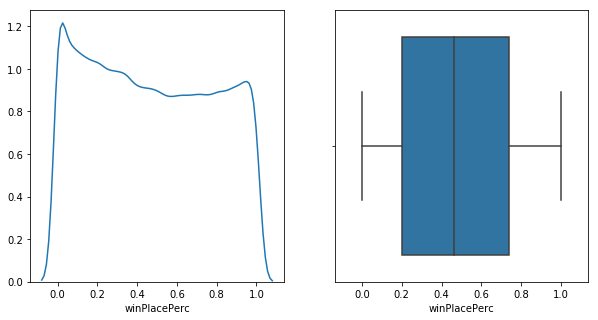

count    4446966.000
mean           1.370
std            2.680
min            0.000
25%            0.000
50%            0.000
75%            2.000
max           80.000
Name: heals, dtype: object
\begin{tabular}{ll}
\toprule
{} &        heals \\
\midrule
count &  4446966.000 \\
mean  &        1.370 \\
std   &        2.680 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &        2.000 \\
max   &       80.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

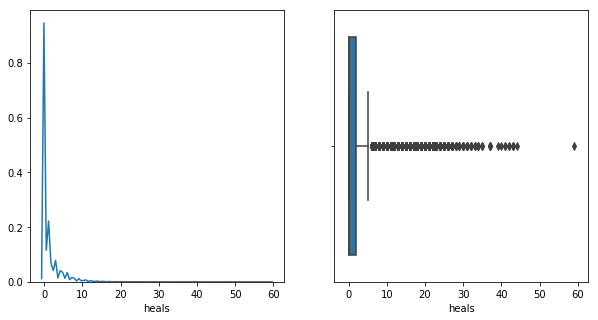

count    4446966.000
mean         505.006
std          627.505
min            0.000
25%            0.000
50%            0.000
75%         1172.000
max         2170.000
Name: killPoints, dtype: object
\begin{tabular}{ll}
\toprule
{} &   killPoints \\
\midrule
count &  4446966.000 \\
mean  &      505.006 \\
std   &      627.505 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &     1172.000 \\
max   &     2170.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

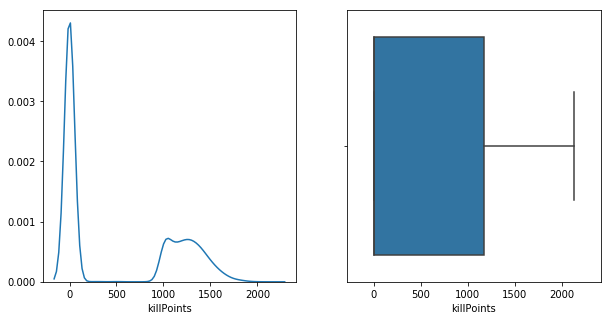

count    4446966.000
mean         606.460
std          739.700
min            0.000
25%            0.000
50%            0.000
75%         1495.000
max         2013.000
Name: winPoints, dtype: object
\begin{tabular}{ll}
\toprule
{} &    winPoints \\
\midrule
count &  4446966.000 \\
mean  &      606.460 \\
std   &      739.700 \\
min   &        0.000 \\
25\%   &        0.000 \\
50\%   &        0.000 \\
75\%   &     1495.000 \\
max   &     2013.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

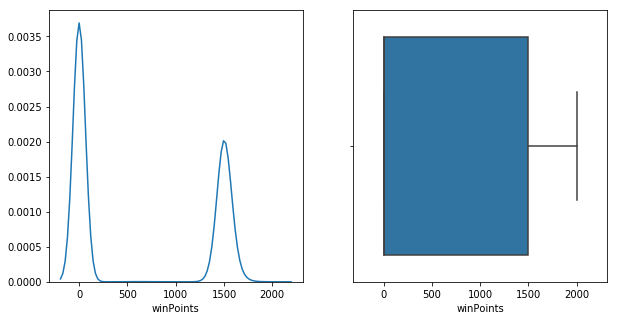

count    4446966.000
mean         892.010
std          736.648
min           -1.000
25%           -1.000
50%         1443.000
75%         1500.000
max         5910.000
Name: rankPoints, dtype: object
\begin{tabular}{ll}
\toprule
{} &   rankPoints \\
\midrule
count &  4446966.000 \\
mean  &      892.010 \\
std   &      736.648 \\
min   &       -1.000 \\
25\%   &       -1.000 \\
50\%   &     1443.000 \\
75\%   &     1500.000 \\
max   &     5910.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

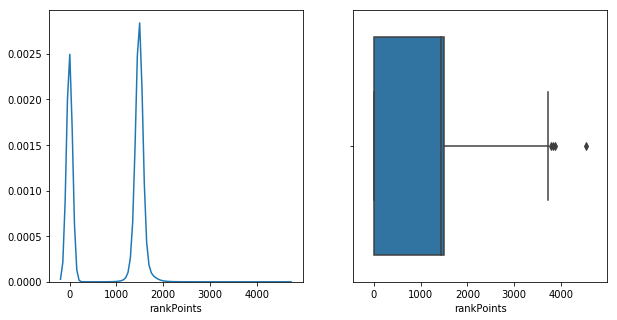

count    4446966.000
mean        1579.506
std          258.740
min            9.000
25%         1367.000
50%         1438.000
75%         1851.000
max         2237.000
Name: matchDuration, dtype: object
\begin{tabular}{ll}
\toprule
{} & matchDuration \\
\midrule
count &   4446966.000 \\
mean  &      1579.506 \\
std   &       258.740 \\
min   &         9.000 \\
25\%   &      1367.000 \\
50\%   &      1438.000 \\
75\%   &      1851.000 \\
max   &      2237.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

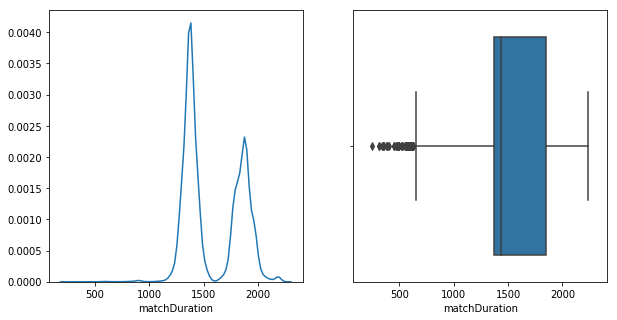

count    4446966.000
mean        1579.506
std          258.740
min            9.000
25%         1367.000
50%         1438.000
75%         1851.000
max         2237.000
Name: matchDuration, dtype: object
\begin{tabular}{ll}
\toprule
{} & matchDuration \\
\midrule
count &   4446966.000 \\
mean  &      1579.506 \\
std   &       258.740 \\
min   &         9.000 \\
25\%   &      1367.000 \\
50\%   &      1438.000 \\
75\%   &      1851.000 \\
max   &      2237.000 \\
\bottomrule
\end{tabular}



<Figure size 432x288 with 0 Axes>

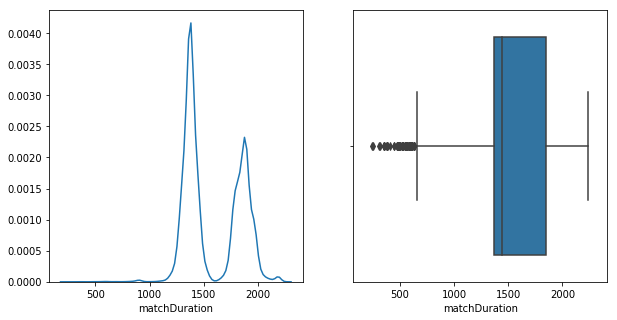

In [26]:
for i, col in enumerate(in_match_player_features+global_player_features+['matchDuration']):
    
    plt.figure(i)
    print(df[col].describe().apply(lambda x: format(x, '.3f')))
    print(df[col].describe().apply(lambda x: format(x, '.3f')).to_latex())

    sample = df[col].sample(200000)
#     print(col)
#     print(sample.head(3))
    f, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
    sns.distplot(sample, ax=axes[0],hist=False)
    sns.boxplot(sample, ax=axes[1])
    output_path = os.path.join('out',col+'.png')   
    plt.savefig(output_path)
    plt.show()


### Missing Values

In [16]:
df.isna().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

As the number of NaN is completely insignificant we can drop them.

In [30]:
df.dropna(inplace=True)

### Data Correlation

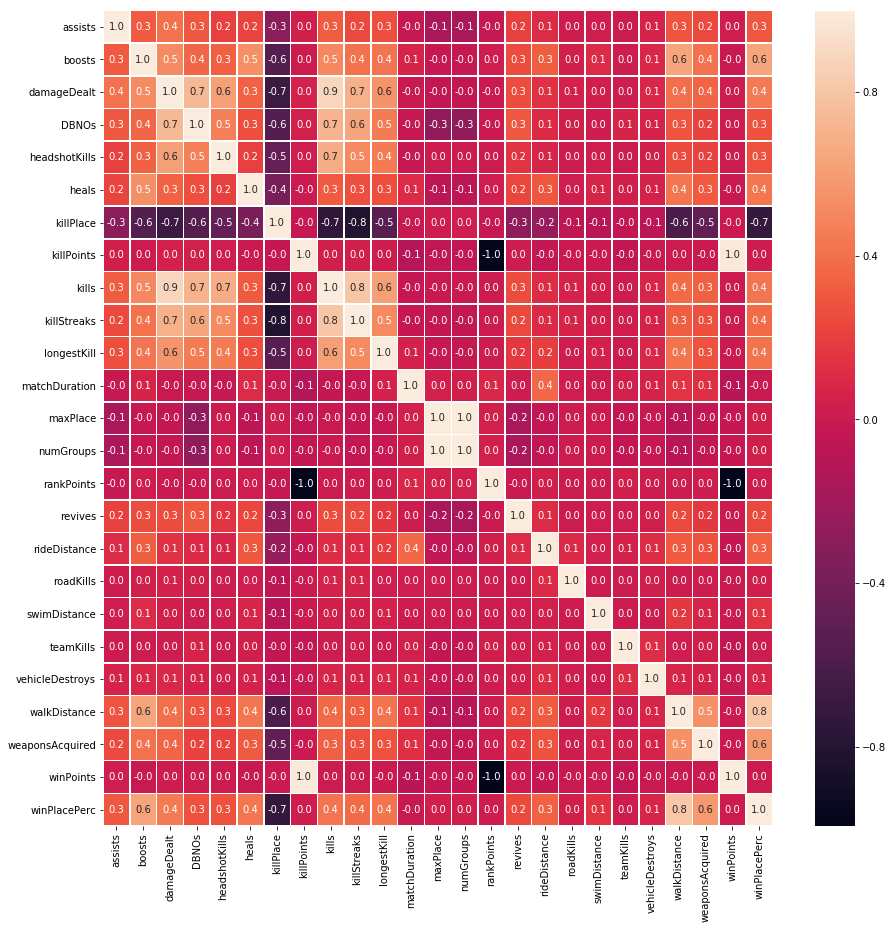

In [28]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
output_path = os.path.join('out','correlacao'+'.png')   
plt.savefig(output_path)

plt.show()


In terms of the target variable (winPlacePerc), there are a few variables high medium to high correlation. The highest positive correlation is walkDistance and the highest negative the killPlace.

**Let's zoom to the top-5 most positive correlated variables with the target.**

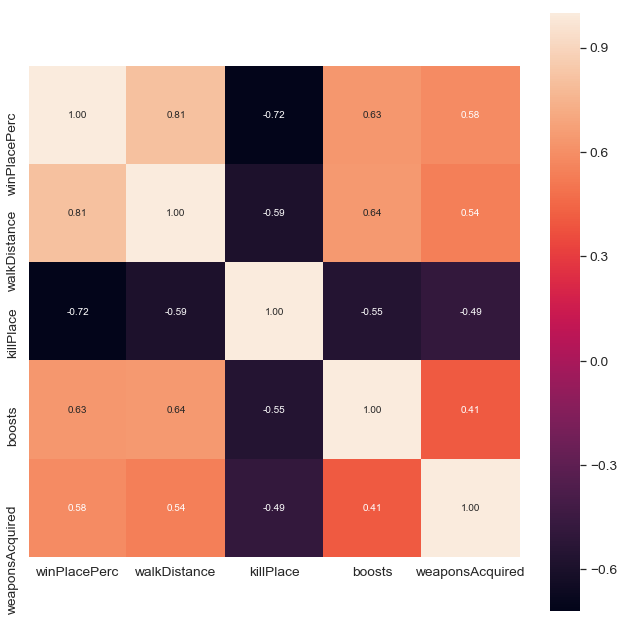

In [31]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().abs().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

output_path = os.path.join('out','corr_top_5'+'.png')   
plt.savefig(output_path)


plt.show()

Let's plot the above variables and the killPlace variable as pairs.

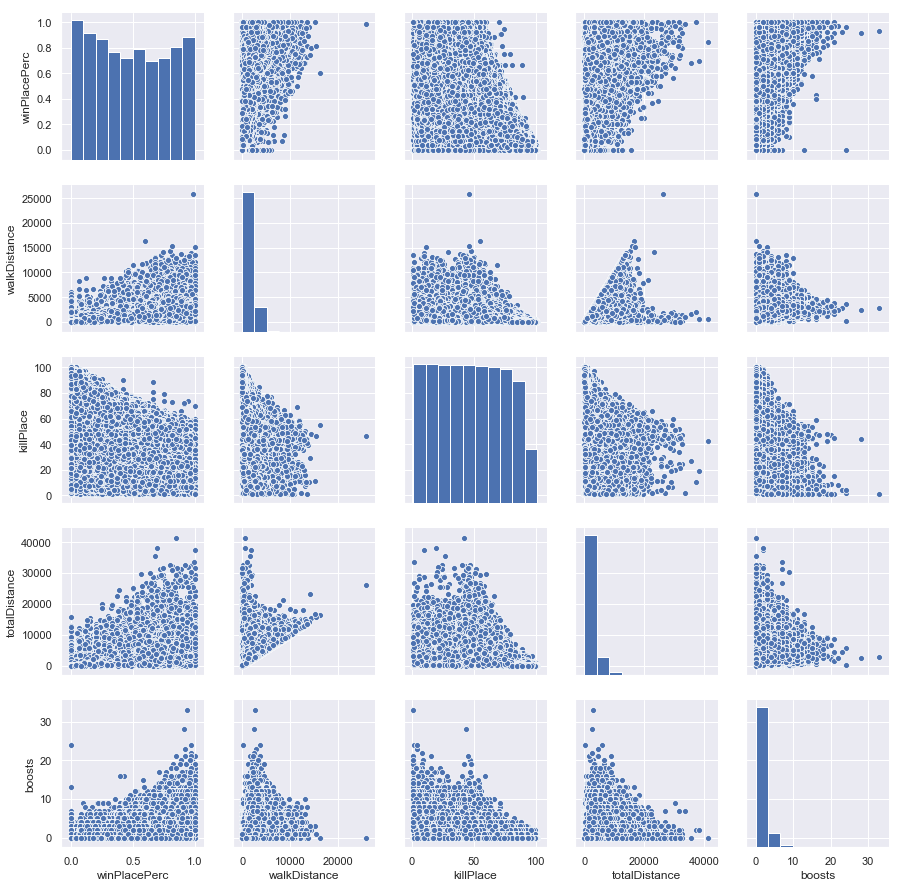

In [36]:
sns.set()
sns.pairplot(df[cols], size = 2.5)
plt.show()

Ok, now that we have a glimpse of the data, let's explore them.

## The Killers

<img src="https://i.ytimg.com/vi/rnAeX795Jn0/maxresdefault.jpg" alt="The Killers" style="width: 700px;"/>


In [32]:
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(df['kills'].mean(),df['kills'].quantile(0.99), df['kills'].max()))

The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


Let's plot the kill counts.

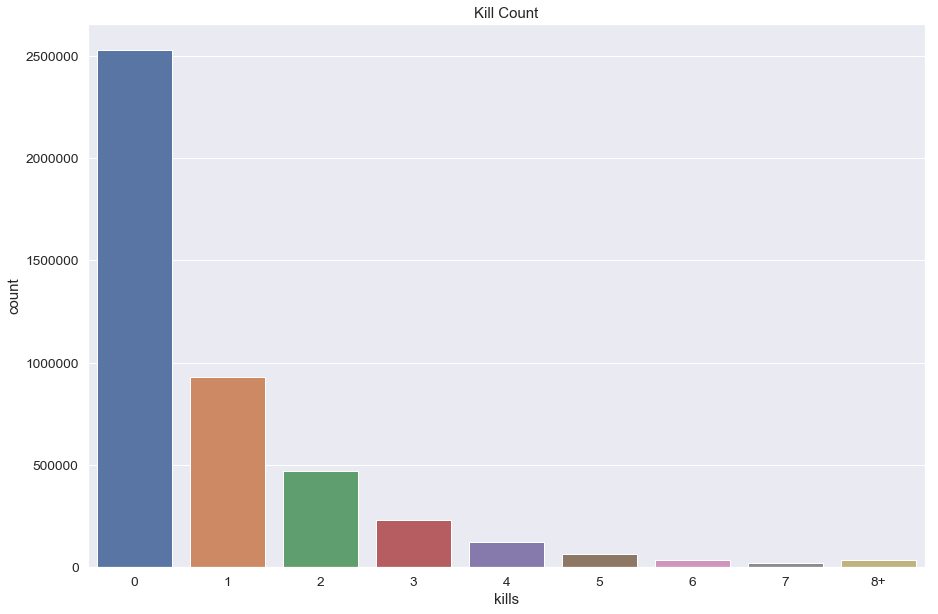

In [34]:
data = df.copy()
data.loc[data['kills'] > data['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
output_path = os.path.join('out','kill_count'+'.png')   
plt.savefig(output_path)

plt.show()

Most people can't make a single kill. At least do they do damage?

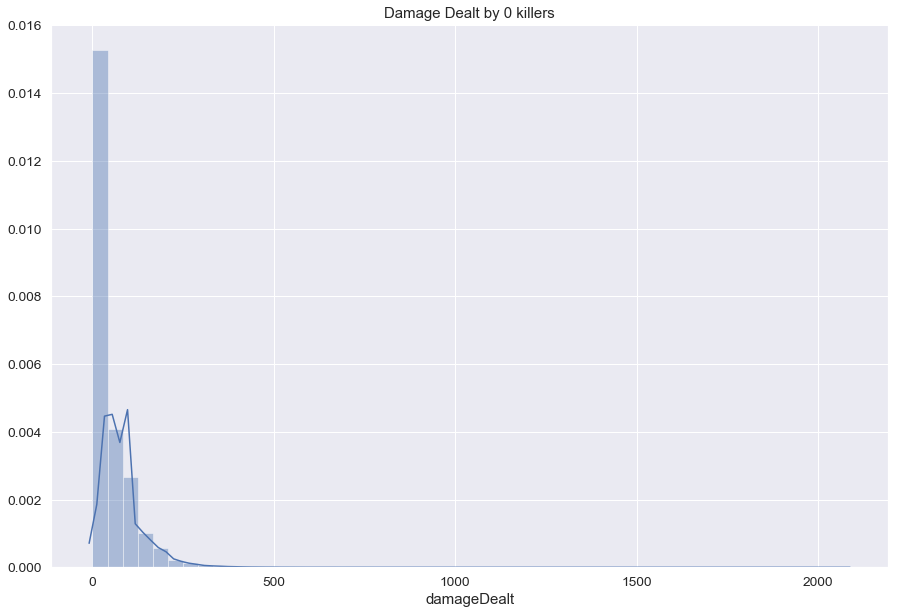

In [35]:
data = df.copy()
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'])
output_path = os.path.join('out','damage_dealt_0_killers'+'.png')   
plt.savefig(output_path)
plt.show()

Well, most of them don't. Let's investigate the exceptions.

In [36]:
print("{} players ({:.4f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(df)))

data1 = df[df['damageDealt'] == 0].copy()
print("{} players ({:.4f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(df)))

16666 players (0.3748%) have won without a single kill!
4770 players (0.1073%) have won without dealing damage!


Plot win placement percentage vs kills.

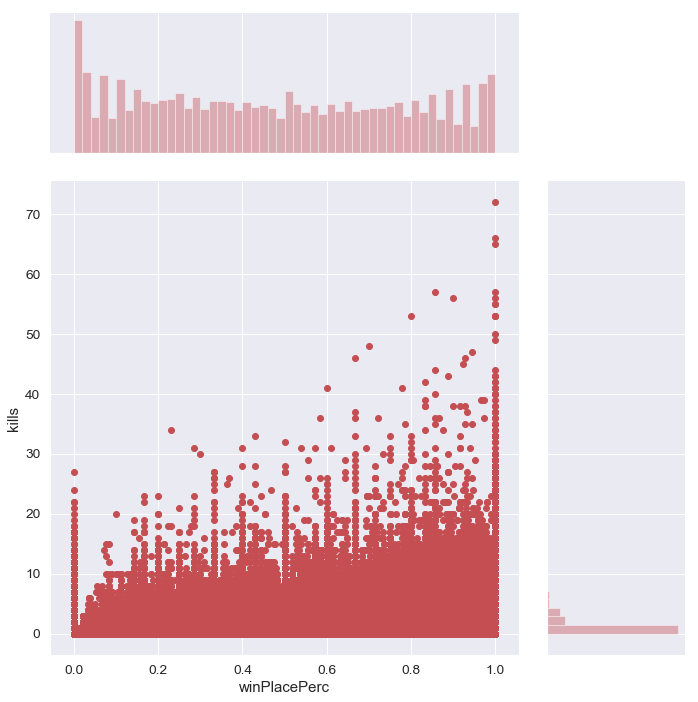

In [37]:
sns.jointplot(x="winPlacePerc", y="kills", data=df, height=10, ratio=3, color="r")
output_path = os.path.join('out','kill_win_place'+'.png')   
plt.savefig(output_path)

plt.show()

Apparentrly killing has a correlation with winning. Finally let's group players based on kills (0 kills, 1-2 kills, 3-5 kills, 6-10 kills and 10+ kills).

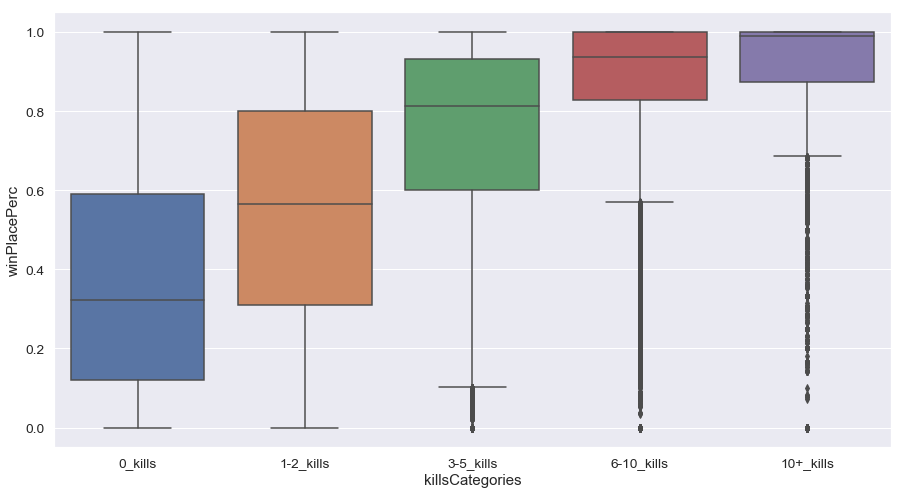

In [38]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
output_path = os.path.join('out','kill_categories_win_place'+'.png')   
plt.savefig(output_path)
plt.show()

## The Runners

<img src="https://steemitimages.com/DQmRmYLRxu1vUhVtnFAA6bHFbShtr7Wdv1wLrPjdxbRZsjc/maxresdefault%20(2).jpg" alt="The Runners" style="width: 700px;"/>

In [46]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(df['walkDistance'].mean(), df['walkDistance'].quantile(0.99), df['walkDistance'].max()))

The average person walks for 1180.7m, 99% of people have walked 4411.0m or less, while the marathoner champion walked for 25780.0m.


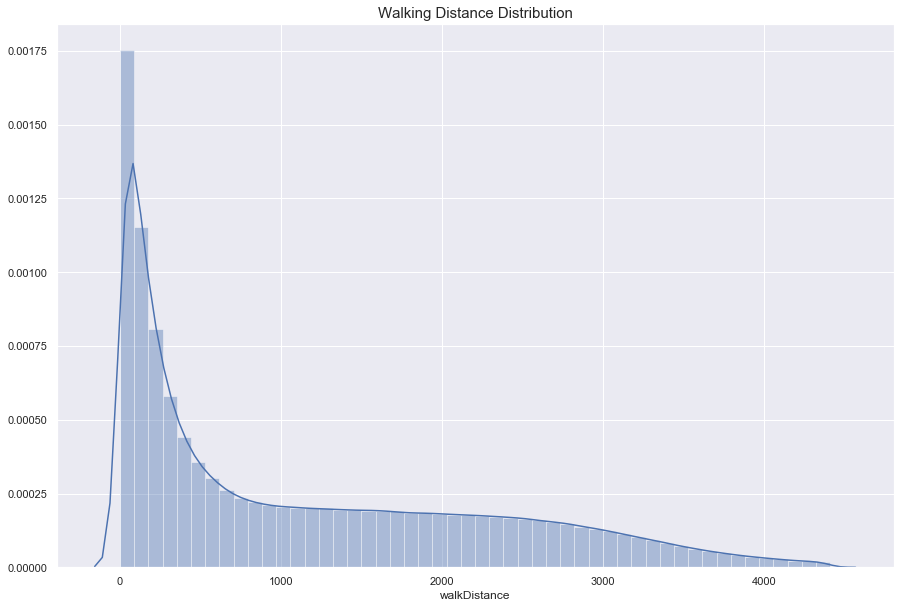

In [47]:
data = df.copy()
data = data[data['walkDistance'] < data['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

In [48]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(df)))

0 players (0.0000%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


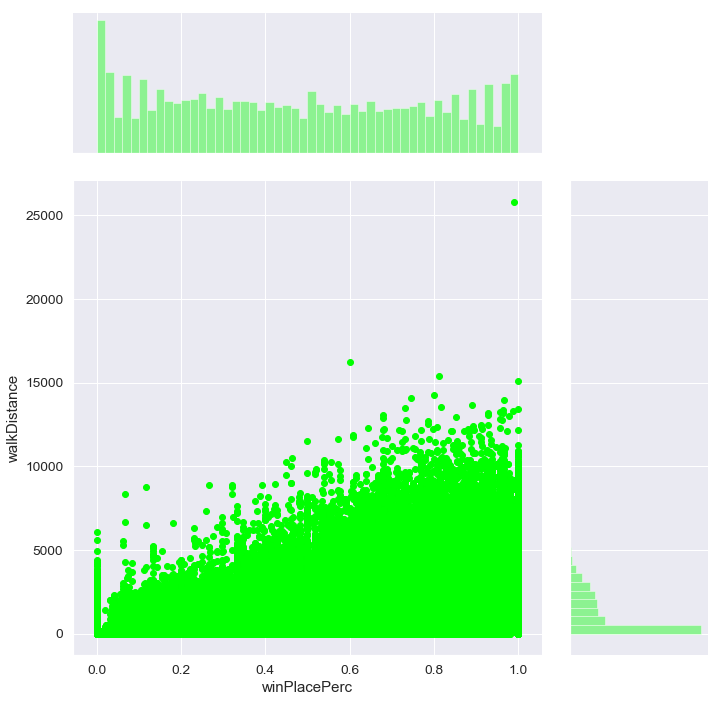

In [39]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="lime")
output_path = os.path.join('out','walk_distance_win_place'+'.png')   
plt.savefig(output_path)
plt.show()

Apparently walking has a high correlation with winPlacePerc.

## The Drivers

<img src="http://cdn.gamer-network.net/2018/metabomb/pubghowtodrivecarsandbikes.jpg" alt="The Drivers" style="width: 700px;"/>

In [ ]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(df['rideDistance'].mean(), df['rideDistance'].quantile(0.99), df['rideDistance'].max()))

The average person drives for 620.0m, 99% of people have drived 7003.0m or less, while the formula 1 champion drived for 40710.0m.


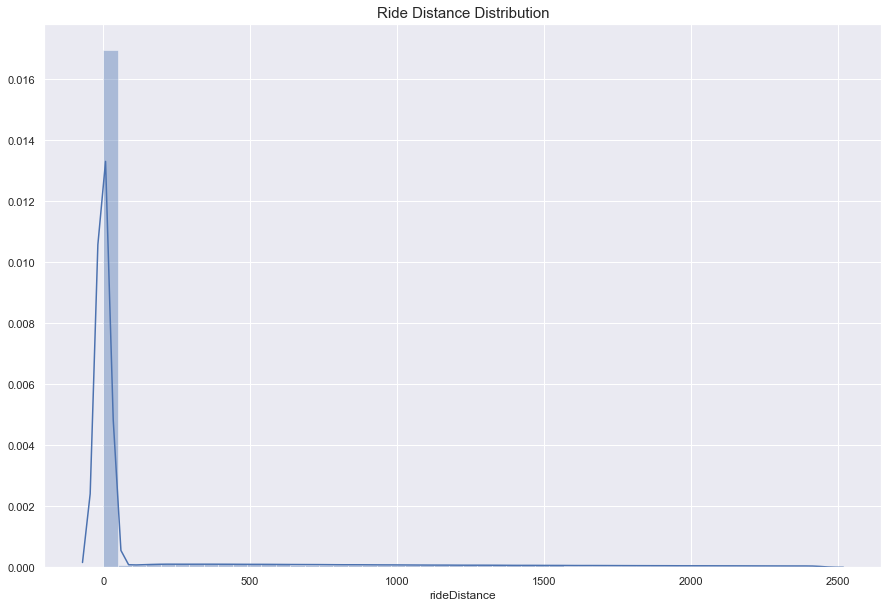

In [ ]:
data = df.copy()
data = data[data['rideDistance'] < df['rideDistance'].quantile(0.9)]
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

In [ ]:
print("{} players ({:.4f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data[data['rideDistance']==0])/len(data)))

3210004 players (82.0433%) drived for 0 meters. This means that they don't have a driving licence yet.


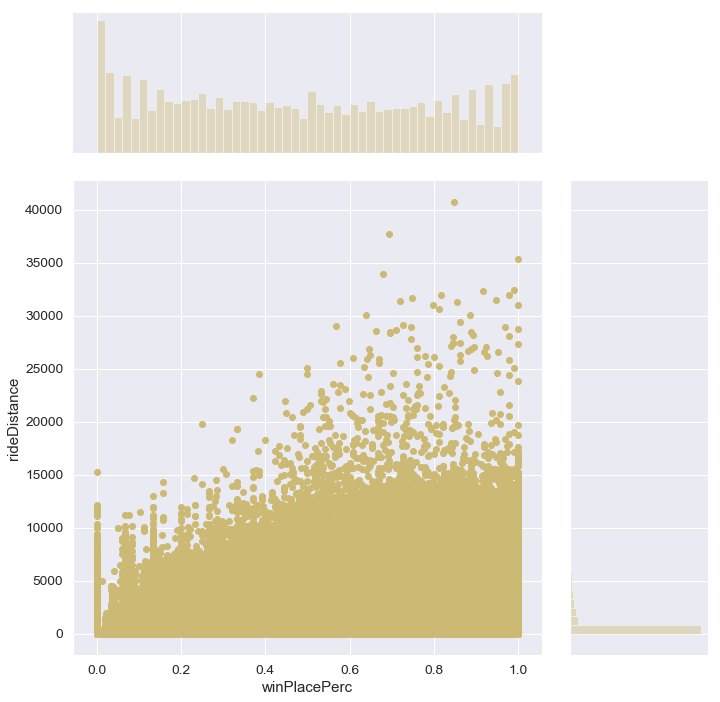

In [40]:
sns.jointplot(x="winPlacePerc", y="rideDistance", data=df, height=10, ratio=3, color="y")
output_path = os.path.join('out','rideDistance_winPlace'+'.png')   
plt.savefig(output_path)
plt.show()

There is a small correlation between rideDistance and winPlacePerc.

Destroying a vehicle in my experience shows that a player has skills. Let's check it.

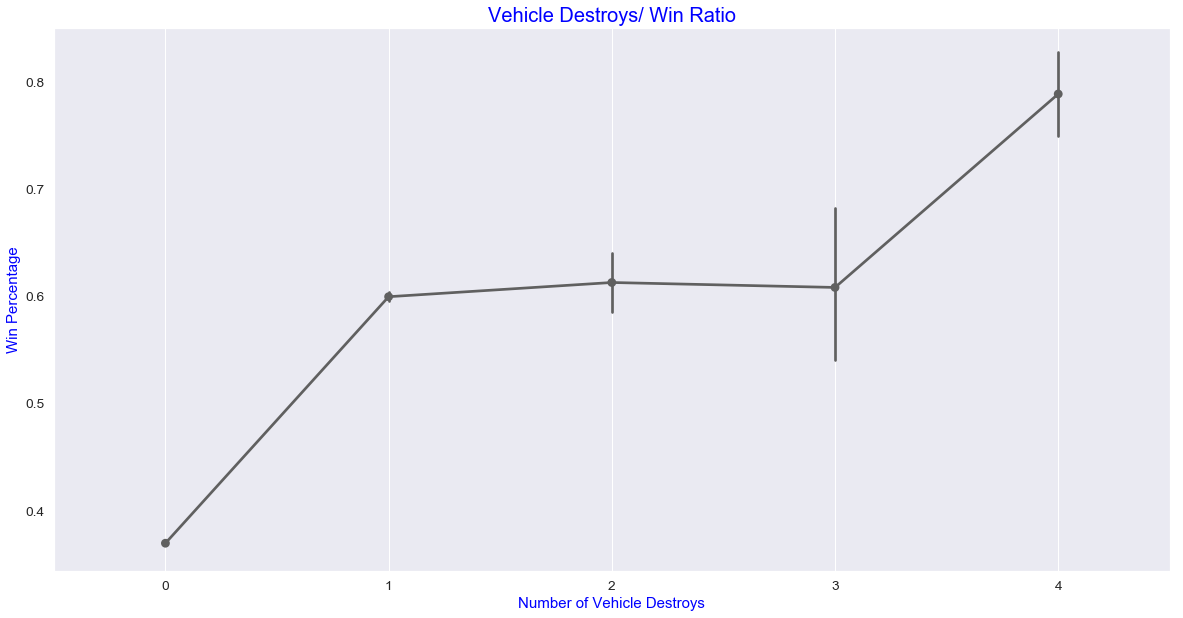

In [41]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='#606060',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
output_path = os.path.join('out','vehicle_destroys_winRario'+'.png')   
plt.savefig(output_path)
plt.show()

My experience was correct. Destroying a single vehicle increases your chances of winning!

## The Swimmers

<img src="https://i.ytimg.com/vi/tQxzsE0DijQ/maxresdefault.jpg" alt="The Swimmers" style="width: 700px;"/>

In [18]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(df['swimDistance'].mean(), df['swimDistance'].quantile(0.99), df['swimDistance'].max()))

The average person swims for 4.6m, 99% of people have swimemd 124.80000000000001m or less, while the olympic champion swimmed for 3823.0m.


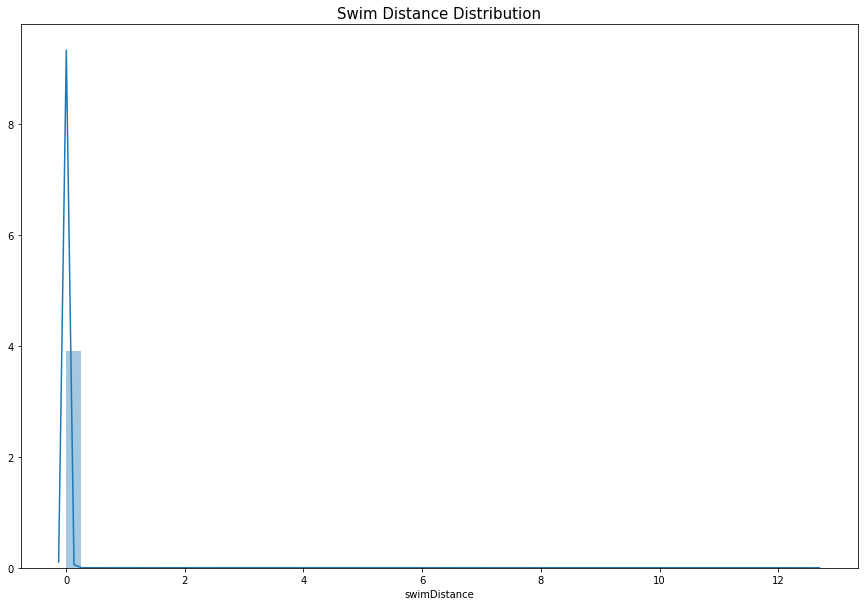

In [25]:
data = df.copy()
data = data[data['swimDistance'] < data['swimDistance'].quantile(0.95)]
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'])
# sns.distplot(data['swimDistance'])

plt.show()

Almost no one swims. Let's group the swimming distances in 4 categories and plot vs winPlacePerc.

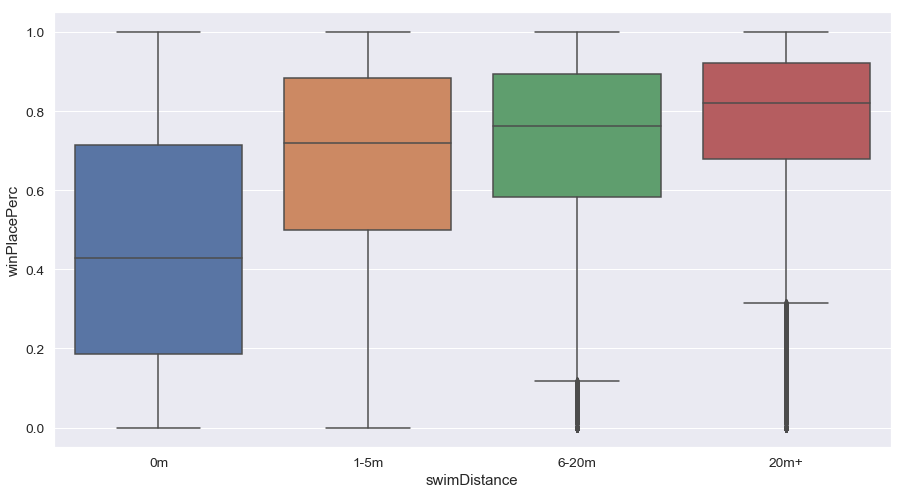

In [42]:
swim = df.copy()

swim['swimDistance'] = pd.cut(swim['swimDistance'], [-1, 0, 5, 20, 5286], labels=['0m','1-5m', '6-20m', '20m+'])

plt.figure(figsize=(15,8))
sns.boxplot(x="swimDistance", y="winPlacePerc", data=swim)
output_path = os.path.join('out','swim_WinPlace'+'.png')   
plt.savefig(output_path)
plt.show()

It seems that if you swim, you rise to the top. In PUBG there are currently 3 maps. One of them has almost no water. Keep that in mind. I might plan on doing analysis to find out in which map a match is played.

## The Healers

<img src="https://i.ytimg.com/vi/xfI9XljX51k/maxresdefault.jpg" alt="The Healers" style="width: 700px;"/>

In [34]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(df['heals'].mean(), df['heals'].quantile(0.99), df['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(df['boosts'].mean(), df['boosts'].quantile(0.99), df['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


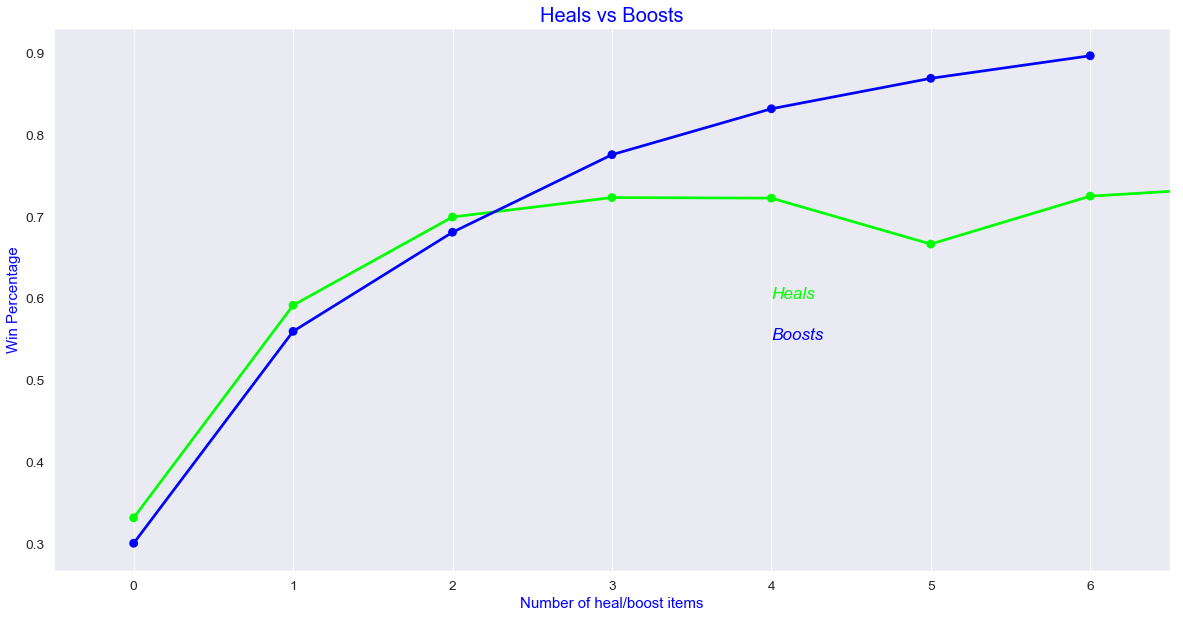

In [43]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
output_path = os.path.join('out','heals_vs_boosts_win_percentage'+'.png')   
plt.savefig(output_path)
plt.show()

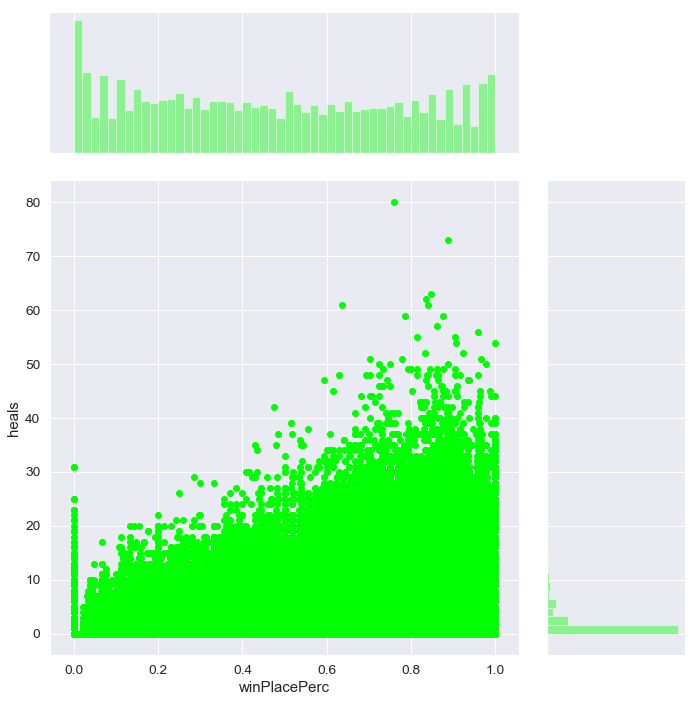

In [44]:
sns.jointplot(x="winPlacePerc", y="heals", data=df, height=10, ratio=3, color="lime")
output_path = os.path.join('out','healds_WinPlace'+'.png')   
plt.savefig(output_path)
plt.show()

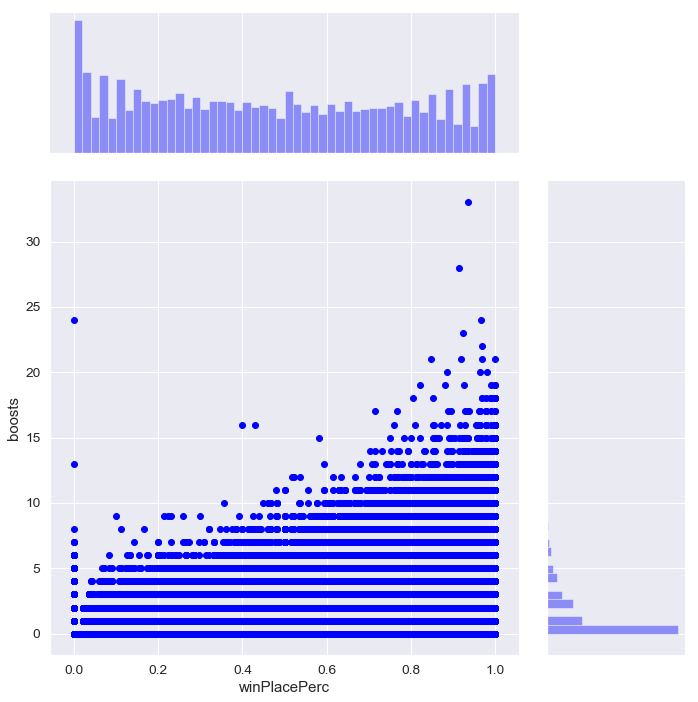

In [45]:
sns.jointplot(x="winPlacePerc", y="boosts", data=df, height=10, ratio=3, color="blue")
output_path = os.path.join('out','boosts_WinPlace'+'.png')   
plt.savefig(output_path)
plt.show()

So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more.

In every plot, there is an abnormal behavior when values are 0.

## Solos, Duos and Squads

There are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25. 

In [47]:
solos = df[df['numGroups']>50]
duos = df[(df['numGroups']>25) & (df['numGroups']<=50)]
squads = df[df['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(df), len(duos), 100*len(duos)/len(df), len(squads), 100*len(squads)/len(df),))

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442528 (9.95%) squad games.


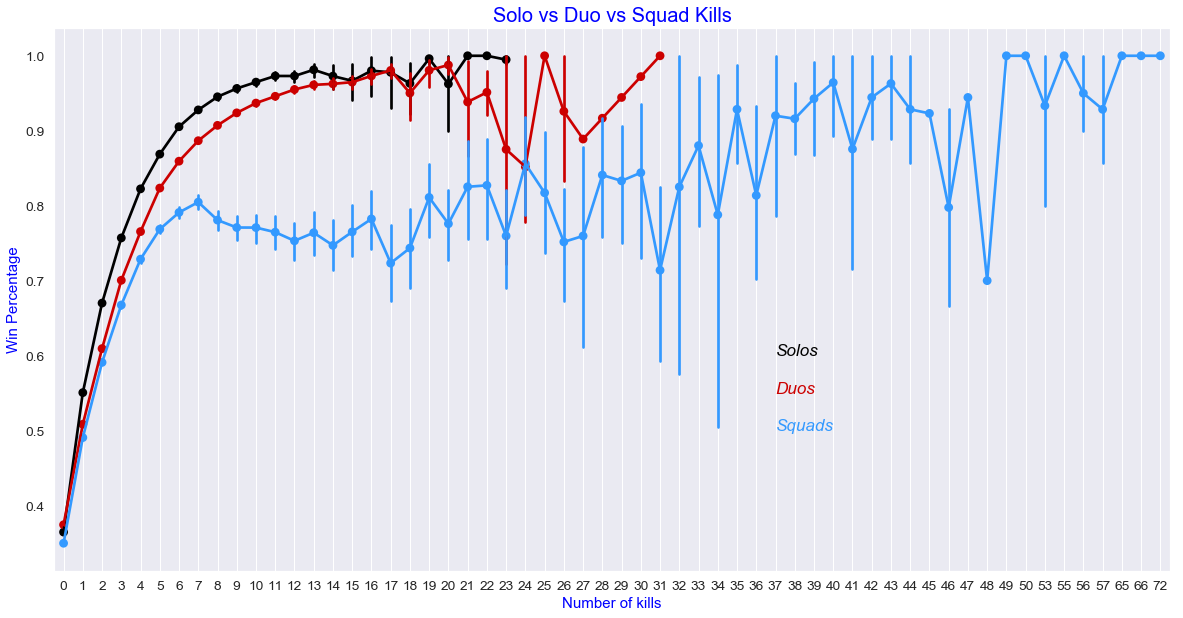

In [48]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
output_path = os.path.join('out','solo_duo_squads_winPlace'+'.png')   
plt.savefig(output_path)
plt.show()

Hmm, very interesting. Solos and duos behave the same, but when playing squads kills don't matter that much.

The attribute DBNOs means enemy players knocked. A "knock" can happen only in duos or squads, because the teammates have the chance to "revive" the knocked player in a given time. So a knocked player can be revived or die. If he is revived, the next time he will be knocked, his teammates will have less time to revive him.

The attribute assist can also happen only in duos or squads. It generally means that the player had an involvement in a kill.

The attribute revive also happens in duos or squads.

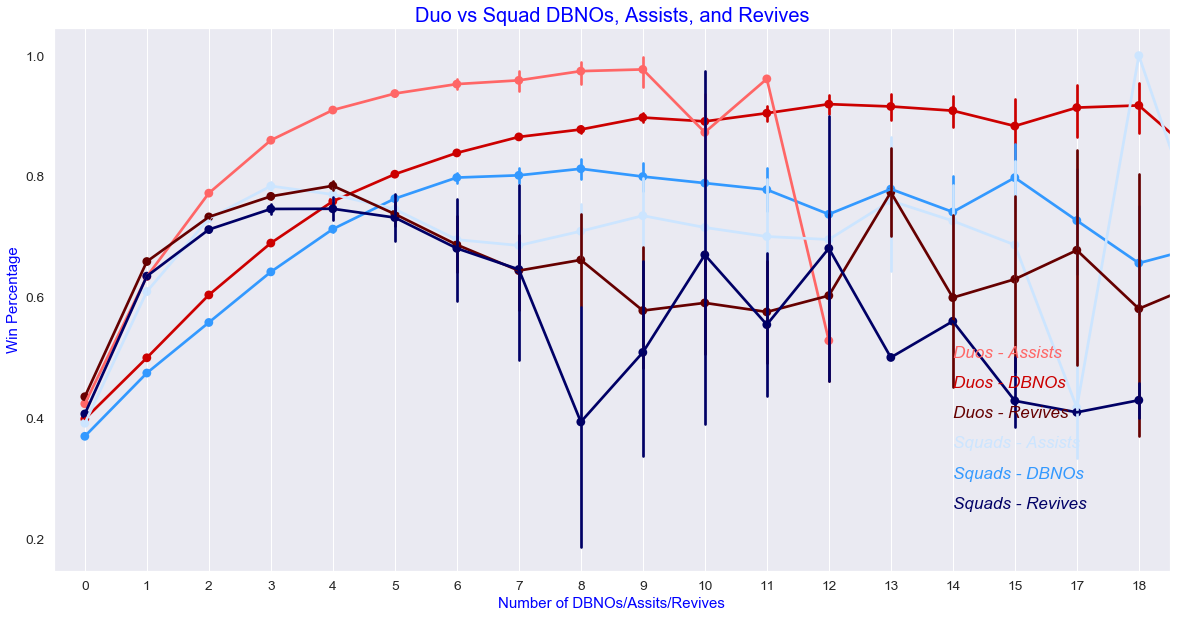

In [49]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
output_path = os.path.join('out','solo_duo_squads_assists_revives'+'.png')   
plt.savefig(output_path)
plt.show()

### Solo, Duo or Quad

Earlier in the kernel we did EDA for Solos, Duos and Squads. Lets create a column for them.

In [46]:
df['team'] = [1 if i>50 else 2 if (i>25 & i<=50) else 4 for i in df['numGroups']]

In [47]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,playersJoined,team
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,...,0,0.00,0,0,244.80,1,1466,0.4444,94,2
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,...,0,11.04,0,0,1434.00,5,0,0.6400,90,4
2,2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,...,0,0.00,0,0,161.80,2,0,0.7755,93,2
3,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,...,0,0.00,0,0,202.70,3,0,0.1667,91,2
4,4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,...,0,0.00,0,0,49.75,2,0,0.1875,94,1


### Number of players in a match

A game in PUBG can have up to 100 players fighting each other. But most of the times a game isn't "full". There is no variable that gives us the number of players joined. So lets create one.

In [50]:
df['playersJoined'] = df.groupby('matchId')['matchId'].transform('count')

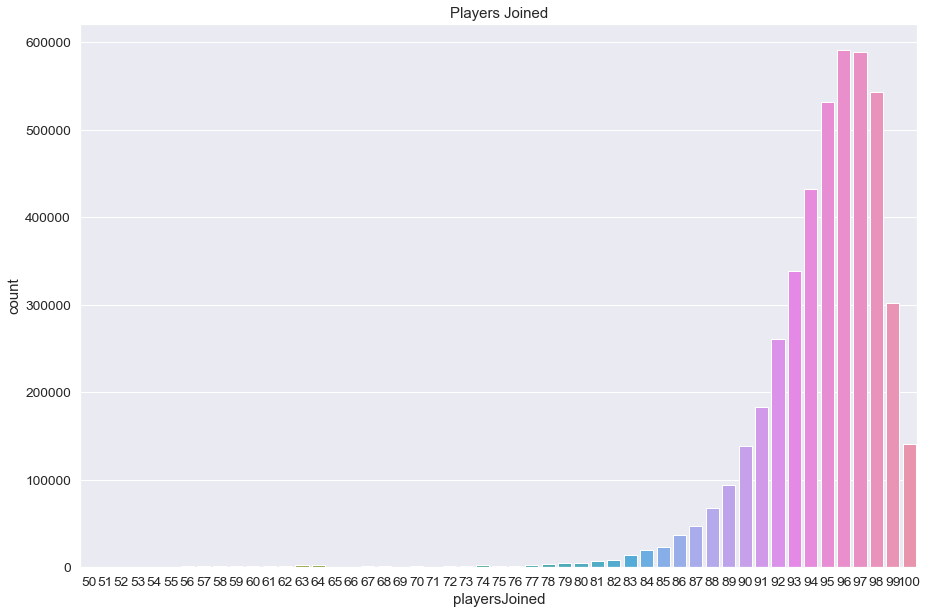

In [51]:
data = df.copy()
data = data[data['playersJoined']>49]
plt.figure(figsize=(15,10))
sns.countplot(data['playersJoined'])
plt.title("Players Joined",fontsize=15)
output_path = os.path.join('out','players_joined'+'.png')   
plt.savefig(output_path)
plt.show()